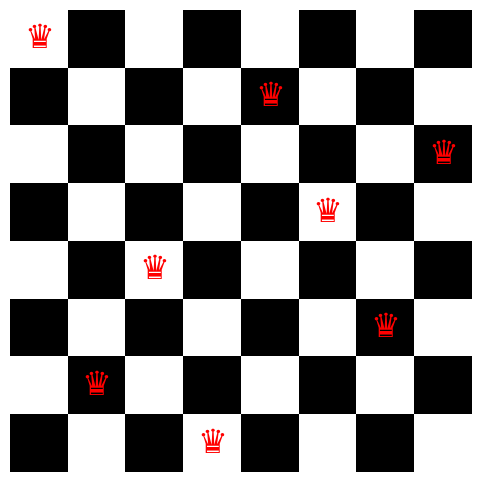

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_chessboard(solution):
    """
    Plots the chessboard with the solution using matplotlib.
    """
    n = len(solution)
    board = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i][j] = 1  

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(board, cmap="gray", interpolation="nearest")

    for row, col in solution:
        ax.text(col, row, '♛', ha='center', va='center', fontsize=24, color="red")

    ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
    ax.grid(which="minor", color="grey", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.axis("off")
    plt.show()

def is_consistent(assignment, row, col):
    """
    Check if placing a queen at (row, col) is consistent with the current assignment.
    """
    for r, c in assignment:
        if c == col or abs(r - row) == abs(c - col):
            return False
    return True

def solve_n_queens_csp(n, row=0, assignment=None):
    """
    Solves the N-Queens problem using CSP with backtracking.
    """
    if assignment is None:
        assignment = []

    if row == n:
        return assignment

    for col in range(n):
        if is_consistent(assignment, row, col):
            assignment.append((row, col))
            result = solve_n_queens_csp(n, row + 1, assignment)
            if result:
                return result
            assignment.pop()  

    return None

n = 8
solution = solve_n_queens_csp(n)
if solution:
    plot_chessboard(solution)
else:
    print("No solution found.")